In [1]:
import numpy as np
import pandas as pd

In [2]:
data = pd.read_csv('diabetes.csv')

In [3]:
data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [4]:
data.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [5]:
data.shape

(768, 9)

In [6]:
data.groupby('Outcome').size()

Outcome
0    500
1    268
dtype: int64

## Visulization

In [7]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000000A6F6878550>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x000000A6F6EC2080>]], dtype=object)

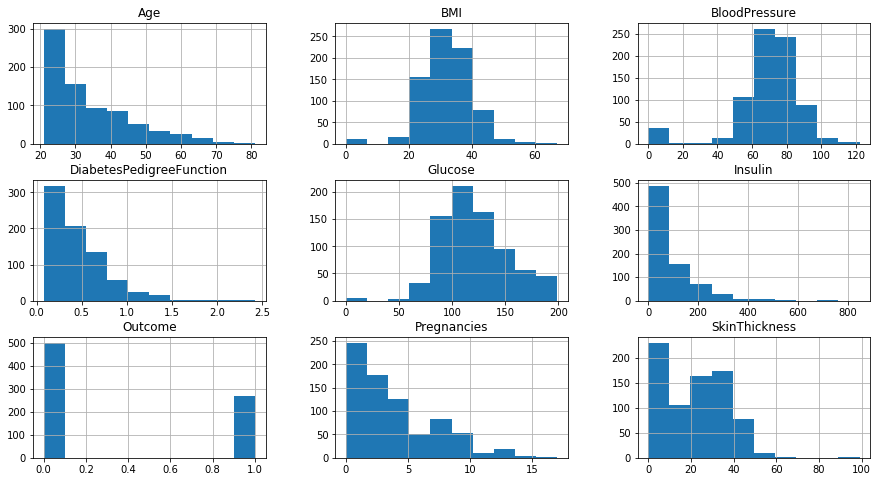

In [8]:
data.hist(figsize = (15,8))

Pregnancies                    AxesSubplot(0.125,0.657941;0.227941x0.222059)
Glucose                     AxesSubplot(0.398529,0.657941;0.227941x0.222059)
BloodPressure               AxesSubplot(0.672059,0.657941;0.227941x0.222059)
SkinThickness                  AxesSubplot(0.125,0.391471;0.227941x0.222059)
Insulin                     AxesSubplot(0.398529,0.391471;0.227941x0.222059)
BMI                         AxesSubplot(0.672059,0.391471;0.227941x0.222059)
DiabetesPedigreeFunction          AxesSubplot(0.125,0.125;0.227941x0.222059)
Age                            AxesSubplot(0.398529,0.125;0.227941x0.222059)
Outcome                        AxesSubplot(0.672059,0.125;0.227941x0.222059)
dtype: object

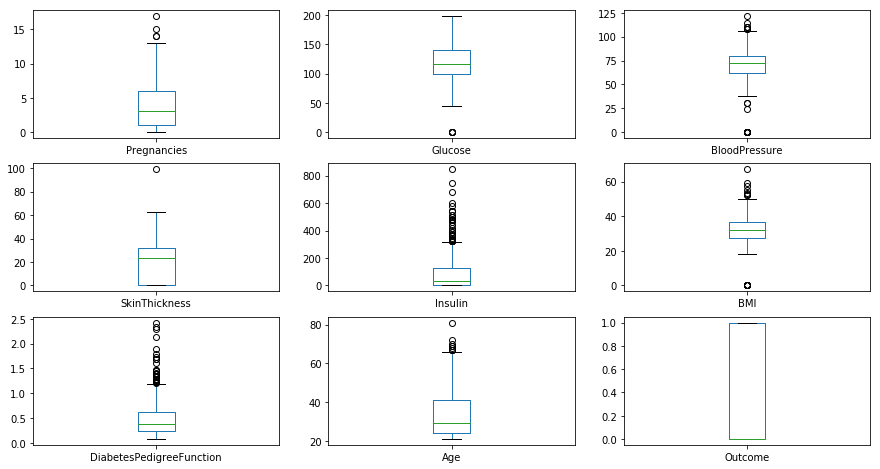

In [9]:
data.plot(kind = "box", subplots = True, layout = (3,3), figsize = (15, 8))

In [10]:
corr = data[data.columns].corr()

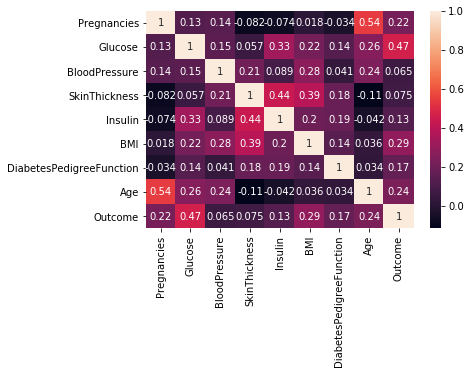

In [11]:
sns.heatmap(corr, annot = True)

## Feature Selection

In [12]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

In [13]:
features = data.columns[0:8]
target = data.columns[8]

In [14]:
K_best_features = SelectKBest(score_func=chi2, k=5)
best = K_best_features.fit(data[features], data[target])

In [15]:
best.transform(data[features])

array([[   6. ,  148. ,    0. ,   33.6,   50. ],
       [   1. ,   85. ,    0. ,   26.6,   31. ],
       [   8. ,  183. ,    0. ,   23.3,   32. ],
       ..., 
       [   5. ,  121. ,  112. ,   26.2,   30. ],
       [   1. ,  126. ,    0. ,   30.1,   47. ],
       [   1. ,   93. ,    0. ,   30.4,   23. ]])

In [16]:
data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


5 best features are Pregnancies, Glucose, Insulin, BMI and Age

In [17]:
imp_features = ['Pregnancies', 'Glucose', 'Insulin', 'BMI', 'Age']

In [18]:
imp_data = pd.DataFrame(data, columns=imp_features)

In [19]:
imp_data.head()

,Pregnancies,Glucose,Insulin,BMI,Age
0,6,148,0,33.6,50
1,1,85,0,26.6,31
2,8,183,0,23.3,32
3,1,89,94,28.1,21
4,0,137,168,43.1,33


Pregnancies       AxesSubplot(0.125,0.657941;0.227941x0.222059)
Glucose        AxesSubplot(0.398529,0.657941;0.227941x0.222059)
Insulin        AxesSubplot(0.672059,0.657941;0.227941x0.222059)
BMI               AxesSubplot(0.125,0.391471;0.227941x0.222059)
Age            AxesSubplot(0.398529,0.391471;0.227941x0.222059)
dtype: object

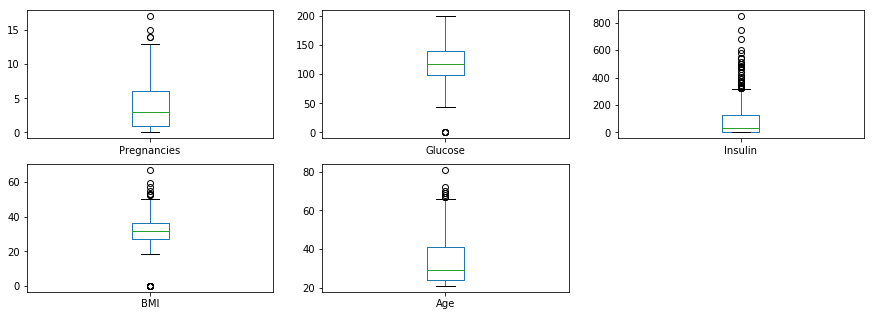

In [20]:
imp_data.plot(kind='box', layout =(3,3), figsize=(15, 8), subplots=True)

In [21]:
from sklearn.preprocessing import StandardScaler
standard = StandardScaler().fit_transform(imp_data)

In [22]:
imp_data = pd.DataFrame(data = standard, columns=imp_data.columns)

In [23]:
imp_data.head()

,Pregnancies,Glucose,Insulin,BMI,Age
0,0.639947,0.848324,-0.692891,0.204013,1.425995
1,-0.844885,-1.123396,-0.692891,-0.684422,-0.190672
2,1.233880,1.943724,-0.692891,-1.103255,-0.105584
3,-0.844885,-0.998208,0.123302,-0.494043,-1.041549
4,-1.141852,0.504055,0.765836,1.409746,-0.020496


Pregnancies       AxesSubplot(0.125,0.657941;0.227941x0.222059)
Glucose        AxesSubplot(0.398529,0.657941;0.227941x0.222059)
Insulin        AxesSubplot(0.672059,0.657941;0.227941x0.222059)
BMI               AxesSubplot(0.125,0.391471;0.227941x0.222059)
Age            AxesSubplot(0.398529,0.391471;0.227941x0.222059)
dtype: object

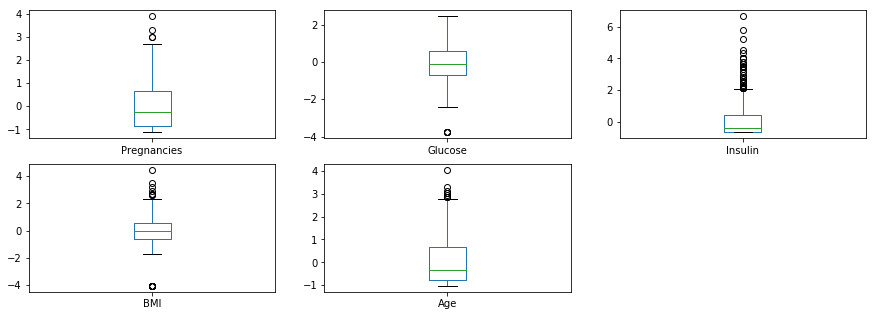

In [24]:
imp_data.plot(kind='box', subplots=True, layout=(3,3), figsize=(15, 8))

## Model 

In [25]:
from sklearn.model_selection import train_test_split

In [26]:
imp_data.shape

(768, 5)

In [27]:
data[target].shape

(768,)

In [28]:
X_train, X_test, y_train, y_test = train_test_split(imp_data, data[target], random_state=99, test_size=0.3)

In [29]:
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier

In [30]:
models = []
models.append(('LR', LogisticRegression()))
models.append(('NB', GaussianNB()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('SVM', SVC()))
models.append(('DT', DecisionTreeClassifier()))

In [31]:
for name, model in models:
    model.fit(X_train,y_train)
    y_pred = model.predict(X_test)
    print(name, accuracy_score(y_pred, y_test))

LR 0.774891774892
NB 0.74025974026
KNN 0.718614718615
SVM 0.770562770563
DT 0.666666666667


In [32]:
lr = LogisticRegression()
lr.fit(X_train, y_train)
y_pred = lr.predict(X_test)
print(accuracy_score(y_pred, y_test))

0.774891774892


## Confusion Matrix

In [33]:
from sklearn.metrics import confusion_matrix

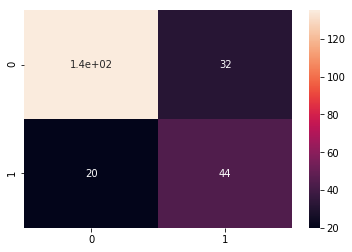

In [34]:
conf = confusion_matrix(y_pred, y_test)
sns.heatmap(data=conf, annot=True)